# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [72]:
# 1. Carregar o dataset
data = pd.read_csv('housing.csv')

# 2. Verificar valores ausentes
data.isnull().sum()

# 3. Preencher os valores nulos na coluna 'total_bedrooms' com a média (sem o uso de inplace)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

# 4. Codificar a variável categórica 'ocean_proximity' utilizando One-Hot Encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# 5. Separar as features (X) e a variável alvo (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Verificar as novas formas dos dados
X.shape, y.shape


((20640, 12), (20640,))

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

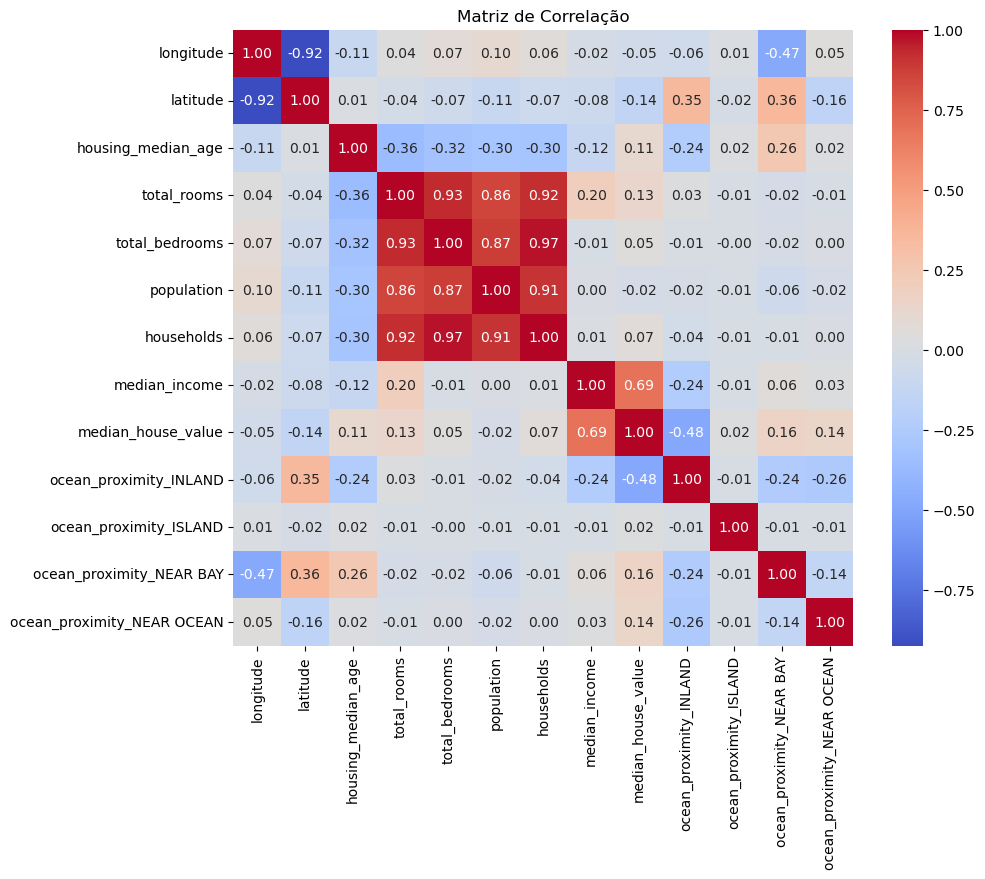

In [74]:
# 1. Calcular a matriz de correlação
correlation_matrix = data.corr()

# 2. Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [76]:
# 1. Separar os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 12), (4128, 12), (16512,), (4128,))

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [78]:
from sklearn.metrics import mean_squared_error

# 1. Treinar a árvore com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# 2. Treinar a árvore com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# 3. Avaliar o desempenho de ambas as árvores
y_pred_8 = tree_depth_8.predict(X_test)
y_pred_2 = tree_depth_2.predict(X_test)

# Calcular o erro quadrático médio (MSE) para ambas as árvores
mse_8 = mean_squared_error(y_test, y_pred_8)
mse_2 = mean_squared_error(y_test, y_pred_2)

# Exibir os resultados
print(f"Erro Quadrático Médio (Profundidade = 8): {mse_8}")
print(f"Erro Quadrático Médio (Profundidade = 2): {mse_2}")


Erro Quadrático Médio (Profundidade = 8): 3944874085.7282896
Erro Quadrático Médio (Profundidade = 2): 6893607949.701682


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [80]:
# 1. Prever os valores no conjunto de treinamento
y_train_pred_8 = tree_depth_8.predict(X_train)
y_train_pred_2 = tree_depth_2.predict(X_train)

# 2. Prever os valores no conjunto de teste
y_test_pred_8 = tree_depth_8.predict(X_test)
y_test_pred_2 = tree_depth_2.predict(X_test)

# 3. Calcular o MSE para o conjunto de treinamento
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)

# 4. Calcular o MSE para o conjunto de teste
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

# Exibir os resultados
print(f"Erro Quadrático Médio - Árvore Profundidade 8 (Treinamento): {mse_train_8}")
print(f"Erro Quadrático Médio - Árvore Profundidade 8 (Teste): {mse_test_8}")

print(f"Erro Quadrático Médio - Árvore Profundidade 2 (Treinamento): {mse_train_2}")
print(f"Erro Quadrático Médio - Árvore Profundidade 2 (Teste): {mse_test_2}")

Erro Quadrático Médio - Árvore Profundidade 8 (Treinamento): 3255361754.42292
Erro Quadrático Médio - Árvore Profundidade 8 (Teste): 3944874085.7282896
Erro Quadrático Médio - Árvore Profundidade 2 (Treinamento): 6710572662.339577
Erro Quadrático Médio - Árvore Profundidade 2 (Teste): 6893607949.701682


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 é a mais adequada, pois apresenta um MSE menor tanto no treinamento quanto no teste, o que indica que ela está conseguindo ajustar bem o modelo e tem um desempenho melhor no conjunto de teste. A diferença entre os erros de treino e teste é relativamente pequena, o que significa que não está sofrendo de overfitting de maneira preocupante.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

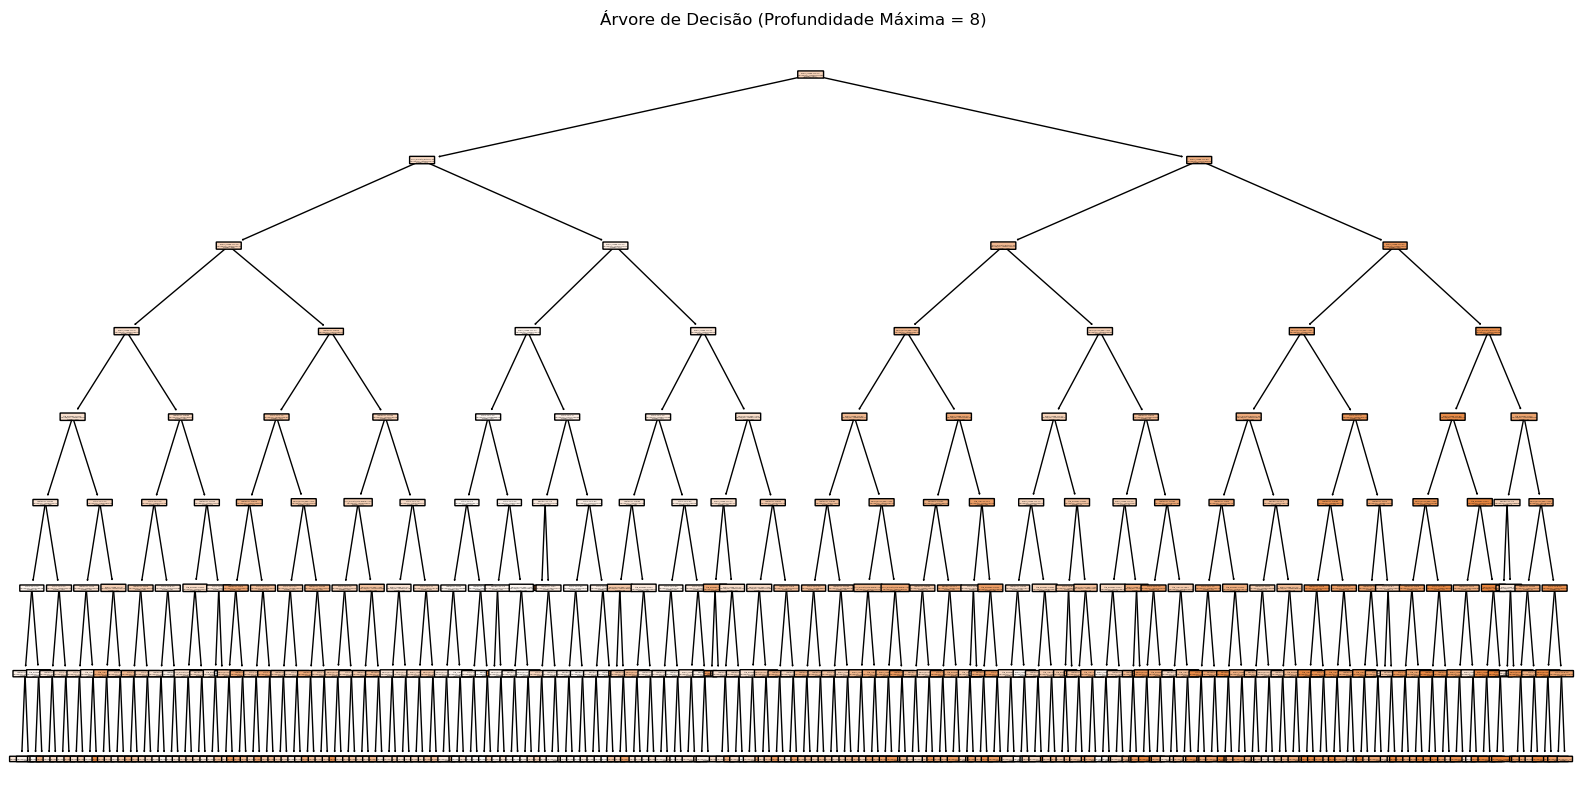

In [82]:
from sklearn.tree import plot_tree

# Visualizar a árvore de decisão com profundidade máxima de 8
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_8, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árvore de Decisão (Profundidade Máxima = 8)')
plt.show()


In [86]:
# Supondo que você já treinou a árvore de decisão (exemplo com profundidade máxima = 8)
tree_depth_8.fit(X_train, y_train)

# Obter importâncias das features
importances = tree_depth_8.feature_importances_

# Criar um DataFrame para relacionar os nomes das colunas com suas importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar o DataFrame por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as importâncias
print(importance_df)

# Identificar a variável mais importante
most_important_feature = importance_df.iloc[0]
print(f"A variável mais importante é: {most_important_feature['Feature']} com importância de {most_important_feature['Importance']:.4f}")



                       Feature  Importance
7                median_income    0.602223
8       ocean_proximity_INLAND    0.188012
0                    longitude    0.080590
1                     latitude    0.062548
2           housing_median_age    0.039118
4               total_bedrooms    0.009807
11  ocean_proximity_NEAR OCEAN    0.007657
5                   population    0.003817
3                  total_rooms    0.003163
6                   households    0.003065
9       ocean_proximity_ISLAND    0.000000
10    ocean_proximity_NEAR BAY    0.000000
A variável mais importante é: median_income com importância de 0.6022
